# A quick demo of dabl on some toy datasets and slightly more interesting datasets

# Scikit-learn build-in datasets:

## Boston housing regression

In [1]:
import dabl
from sklearn.datasets import load_boston
boston = load_boston()
# create a dataframe from an sklearn dataset bunch
boston_df = dabl.utils.data_df_from_bunch(boston)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/supervised.py:583: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Target looks like regression


/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:629: UserWarning: Dropped 3 outliers in column CRIM.
  int(dropped), series.name), UserWarning)


DBG CHAS
category False
DBG label 0.0
DBG label 1.0


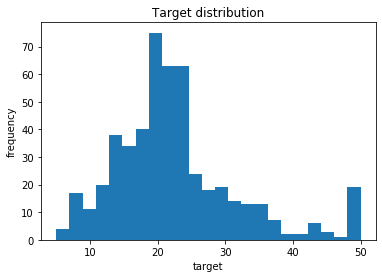

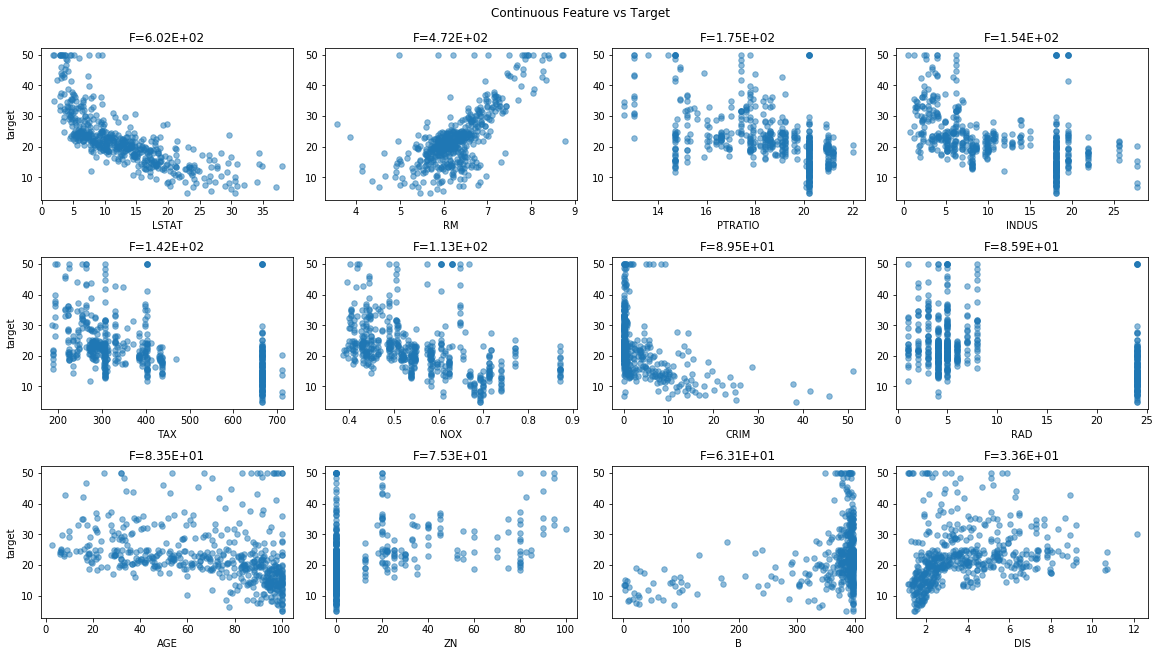

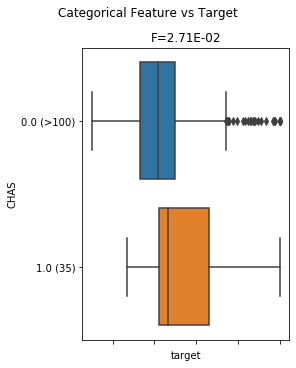

In [2]:
#%pdb
dabl.plot(boston_df, 'target')

Rad is detected as categorical, which might make sense. If you disagree, you can specify it to be continuous:

/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/supervised.py:583: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Target looks like regression


/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:629: UserWarning: Dropped 3 outliers in column CRIM.
  int(dropped), series.name), UserWarning)


DBG CHAS
category False
DBG label 0.0
DBG label 1.0


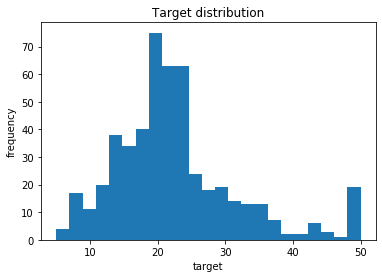

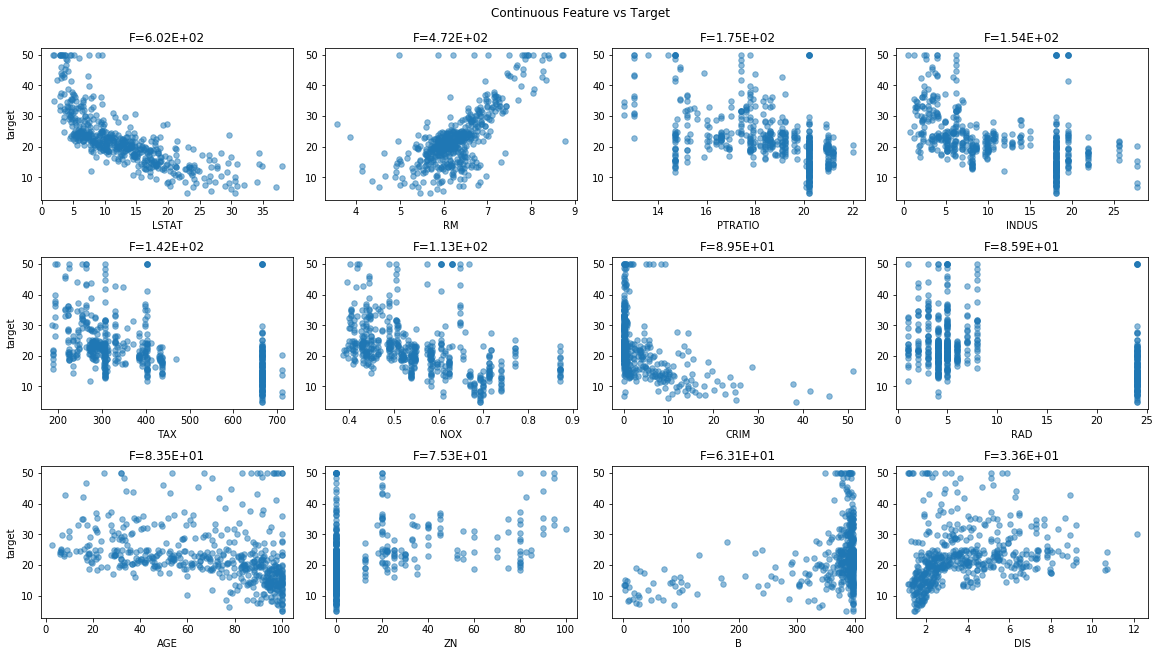

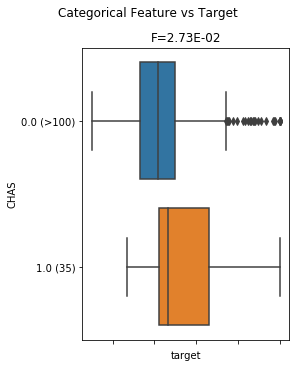

In [3]:
dabl.plot(boston_df, 'target', type_hints={'RAD': 'continuous'})

In [4]:
sr = dabl.SimpleRegressor()
sr.fit(boston_df, target_col='target')

Running DummyRegressor()
r2: -0.010 neg_mean_squared_error: -84.683
=== new best DummyRegressor() (using r2):
r2: -0.010 neg_mean_squared_error: -84.683

Running DecisionTreeRegressor(max_depth=1)
r2: 0.390 neg_mean_squared_error: -50.647
=== new best DecisionTreeRegressor(max_depth=1) (using r2):
r2: 0.390 neg_mean_squared_error: -50.647

Running DecisionTreeRegressor(max_depth=5)
r2: 0.772 neg_mean_squared_error: -18.272
=== new best DecisionTreeRegressor(max_depth=5) (using r2):
r2: 0.772 neg_mean_squared_error: -18.272

Running Ridge(alpha=10)
r2: 0.720 neg_mean_squared_error: -23.489
Running Lasso(alpha=10)
r2: -0.010 neg_mean_squared_error: -84.683

Best model:
DecisionTreeRegressor(max_depth=5)
Best Scores:
r2: 0.772 neg_mean_squared_error: -18.272


SimpleRegressor(random_state=None, refit=True, shuffle=True, type_hints=None,
                verbose=1)

In [5]:
# highly regularized ridge won. r^2 of .5 is not great but also not terrible.
# the fast regression models are not really thought-through yet.
# still we can look at coefficients.
dabl.explain(sr)

In [6]:
# The top features shown in the plot (using f test) also have the largest (absolute) coefficient values, lstat and RM.
# only the top 10 coefficients are shown right now. Clearly we could do better by adding non-linear transformations to the data from the plots above.
# future work!

## Wine classification

In [7]:
from sklearn.datasets import load_wine
wine_df = dabl.utils.data_df_from_bunch(load_wine())
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/supervised.py:583: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Target looks like classification
Linear Discriminant Analysis training set score: 1.000


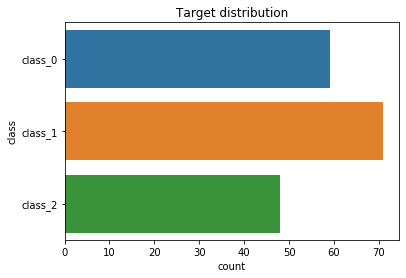

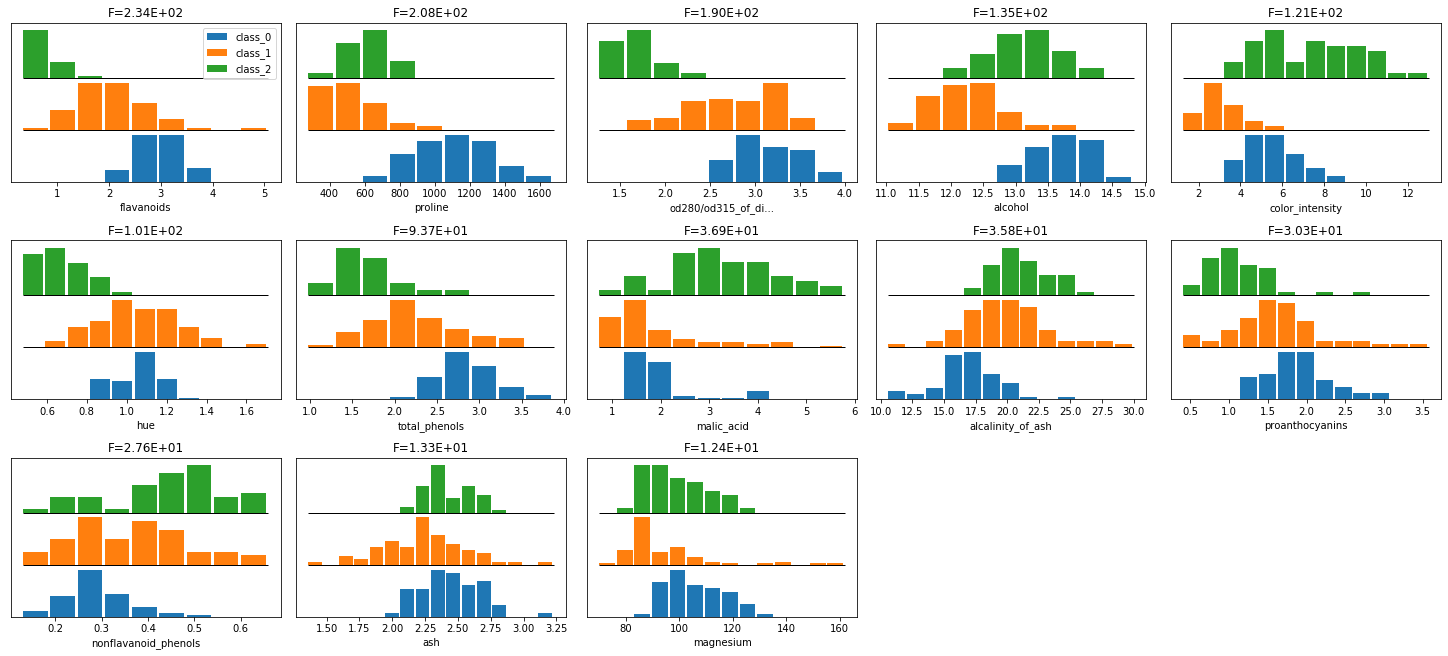

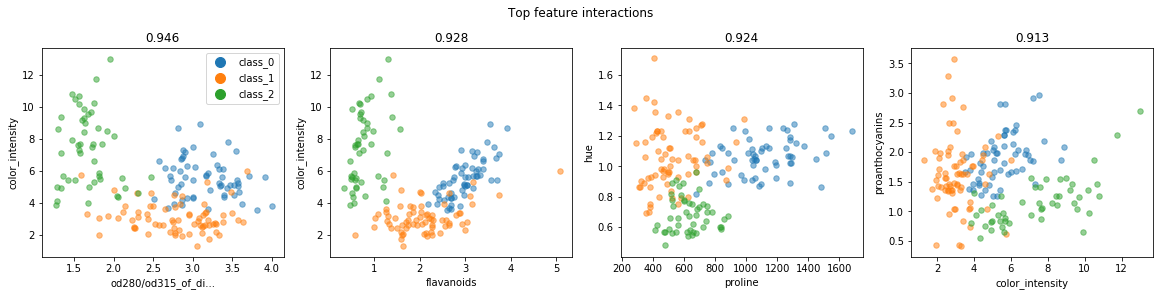

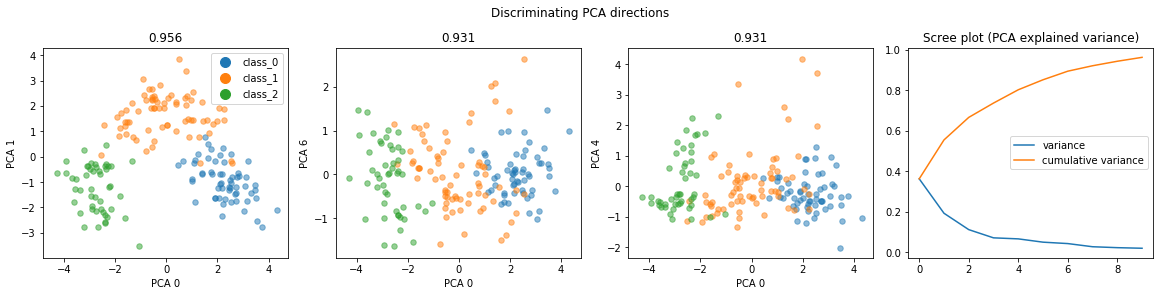

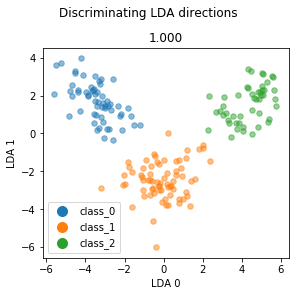

In [8]:
dabl.plot(wine_df, 'target')

In [9]:
# obviously LDA solved the problem as we can see in the last plot. I might just want to use LDA or another linear model.
# Or we see what the SimpleClassifier does:
sc = dabl.SimpleClassifier()
sc.fit(wine_df, target_col='target')

Running DummyClassifier(strategy='prior')
accuracy: 0.399 recall_macro: 0.333 precision_macro: 0.133 f1_macro: 0.190
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.399 recall_macro: 0.333 precision_macro: 0.133 f1_macro: 0.190

Running GaussianNB()
accuracy: 0.978 recall_macro: 0.979 precision_macro: 0.979 f1_macro: 0.978
=== new best GaussianNB() (using recall_macro):
accuracy: 0.978 recall_macro: 0.979 precision_macro: 0.979 f1_macro: 0.978

Running MultinomialNB()
accuracy: 0.955 recall_macro: 0.956 precision_macro: 0.963 f1_macro: 0.957
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.584 recall_macro: 0.645 precision_macro: 0.431 f1_macro: 0.506
Running DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 0.966 recall_macro: 0.967 precision_macro: 0.972 f1_macro: 0.968
Running DecisionTreeClassifier(class_weight='balanced', min_impurity_decrease=0.01)
accuracy: 0.955 recall_macro: 0.956 precision_m

SimpleClassifier(random_state=None, refit=True, shuffle=True, type_hints=None,
                 verbose=1)

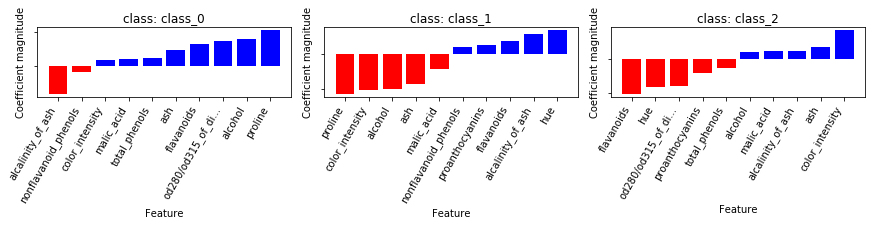

In [10]:
# logistic regression has slightly higher accuracy and macro-average recall (which is the main metric we use)
# than linear discriminant analysis. Not really a shocker.
dabl.explain(sc)

Interestingly the large coefficients don't really correspond to what's shown in the univariate or pairplots. Possibly because the data is very correlated? Who knows!
I assume we could create a simpler model with less features from the plots above. Maybe lasso next time?

## Ames housing dataset

In [11]:
ames_df = dabl.datasets.load_ames()
ames_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Automatic pdb calling has been turned ON


/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/supervised.py:583: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)
/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/preprocessing.py:344: UserWarning: Discarding near-constant features: ['Street', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl', 'Heating', 'Low Qual Fin SF', 'Kitchen AbvGr', 'Garage Cond', '3Ssn Porch', 'Pool Area', 'Misc Val']
  near_constant.index[near_constant].tolist()))


Target looks like regression
Showing only top 10 of 26 continuous features


/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:629: UserWarning: Dropped 5 outliers in column Gr Liv Area.
  int(dropped), series.name), UserWarning)
/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:629: UserWarning: Dropped 1 outliers in column Garage Cars.
  int(dropped), series.name), UserWarning)
/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:629: UserWarning: Dropped 2 outliers in column Total Bsmt SF.
  int(dropped), series.name), UserWarning)
/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:629: UserWarning: Dropped 4 outliers in column 1st Flr SF.
  int(dropped), series.name), UserWarning)
/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:629: UserWarning: Dropped 1 outliers in column Garage Yr Blt.
  int(dropped), series.name), UserWarning)
/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:629: UserWarning: Dropped 7 outliers in column Mas Vnr A

Showing only top 10 of 42 categorical features
DBG MS SubClass
int64 False
DBG label 20
DBG label 30
DBG label 40
DBG label 45
DBG label 50
DBG label 60
DBG label 70
DBG label 75
DBG label 80
DBG label 85
DBG label 90
DBG label 120
DBG label 150
DBG label 160
DBG label 180
DBG label 190
DBG MS Zoning
category False
DBG label A (agr)
DBG label C (all)
DBG label I (all)
DBG label RM
DBG label RH
DBG label RL
DBG label FV
DBG Alley
category False
DBG label Grvl
DBG label Pave
DBG Lot Shape
category False
DBG label Reg
DBG label IR1
DBG label IR2
DBG label IR3
DBG Land Contour
category False
DBG label Bnk
DBG label Lvl
DBG label Low
DBG label HLS
DBG Lot Config
category False
DBG label Inside
DBG label Corner
DBG label FR2
DBG label FR3
DBG label CulDSac
DBG Neighborhood
category False
DBG label OldTown
DBG label Edwards
DBG label Sawyer
DBG label NAmes
DBG label dabl_other
> /home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/supervised.py(197)plot_regression_categorical()
-> co

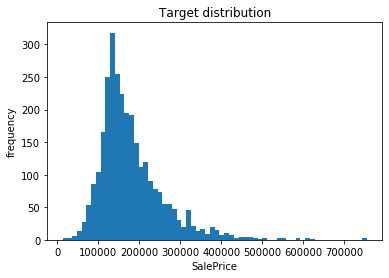

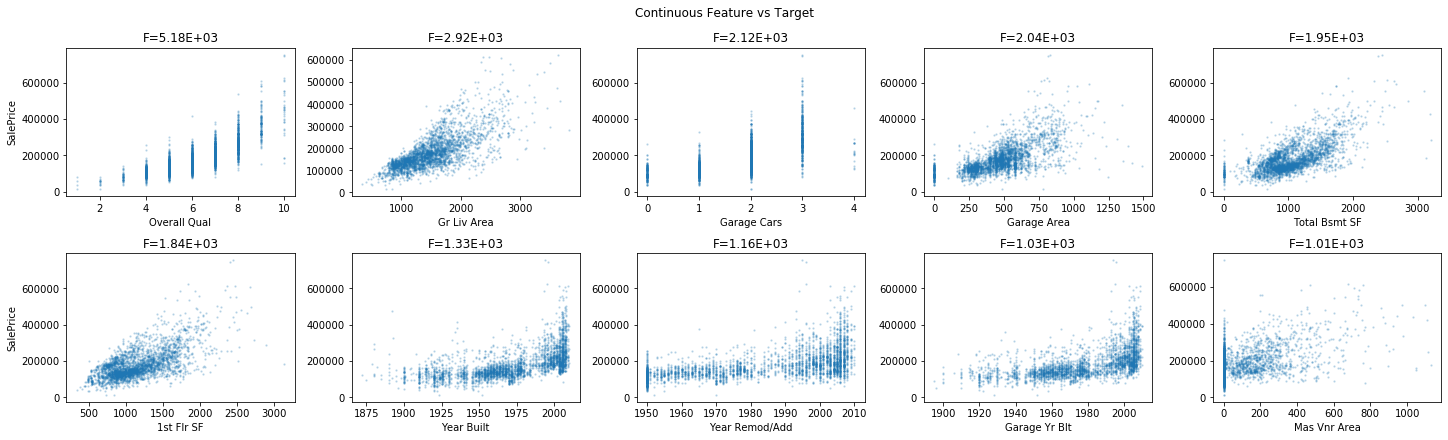

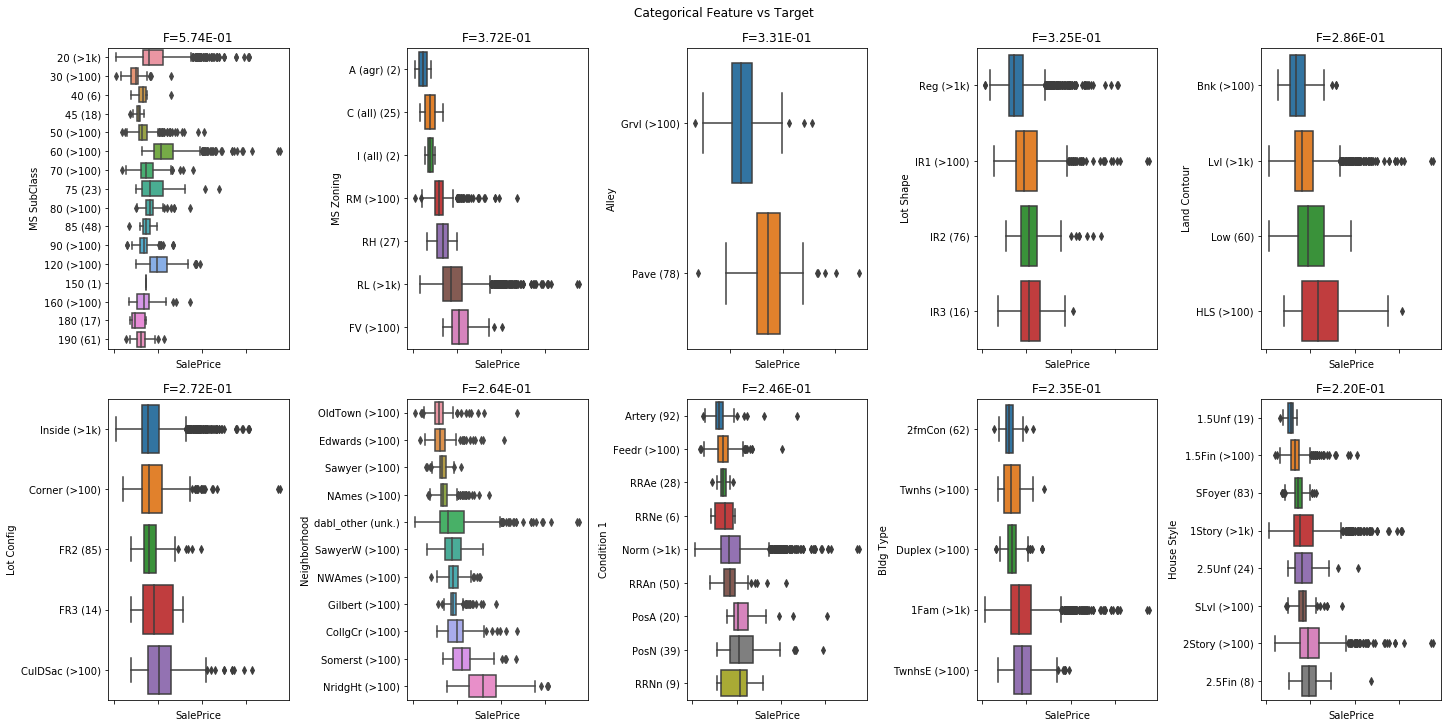

In [12]:
%pdb on
dabl.plot(ames_df, 'SalePrice')

In [13]:
ames_df['Alley'].value_counts(dropna=False)

NaN     2732
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [14]:
%pdb off
sorted(ames_df['Alley'].value_counts(dropna=False).index)

Automatic pdb calling has been turned OFF


TypeError: '<' not supported between instances of 'str' and 'float'

In [ ]:
import numpy as np
sorted([1, 2, np.NaN, 'a'])

In [ ]:
ames_df['Alley'].value_counts(dropna=False)

In [ ]:
import numpy as np
np.unique(ames_df.Alley.dropna(), return_counts=True)

In [ ]:
sorted(ames_df['Alley'].value_counts(dropna=False).index.fillna('unknown'))

In [ ]:
import pandas as pd
import numpy as np
df_test = pd.DataFrame({'Alley': ['Grvl', 'Grvl', 'Pave', np.NaN]})
df_test['Alley'] = df_test['Alley'].astype('category')
df_test['Alley'].value_counts(dropna=False).index#.fillna('n')
#df_test.info()

In [ ]:
df_test['Alley'].cat.categories

In [ ]:
df_test['Alley'].dtype

In [ ]:
hasattr(df_test['Alley'], 'cat')

In [ ]:
import numpy as np 
sorted(np.unique(ames_df["MS Zoning"]))

You can see that high-ordinality categorical variables were summarized with rare categories binned into "dabl_other".
Also, ``GarageCars`` should maybe be plotted as a categorical variable - and there's a garage that will be build in 2200 (it's the outlier that's dropped). Huh.
We were pretty aggressive with dropping "near-constant" features. Maybe being less agressive might be good in some situations?
``Overall Qual`` might also arguably be better shown as a categorical feature, though it's a bit unclear.

In [ ]:
dabl.plot(ames_df, 'SalePrice', type_hints={'Garage Cars': 'categorical'})

In [ ]:
sr = dabl.SimpleRegressor()
sr.fit(ames_df, target_col='SalePrice')

In [ ]:
dabl.explain(sr)

In [ ]:
# The neighborhood seems to dominate, no continuous variable is in the top 10 highest coefficients.